<span style="color:red">***This notebook should be run inside jupyter lab***</span>

# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf

import panel as pn
pn.extension()
# the interactive plotting libs
import holoviews as hv
from holoviews.operation.datashader import inspect, rasterize
# colour maps lib
import colorcet as cc
# a lib for plotting a large dataset
import datashader as ds
# to convet the lat and lon to mercato web format
from datashader.utils import lnglat_to_meters
%matplotlib inline
hv.extension('bokeh')

# Reading Data
First I'll read the raw dataset from the csv file.

In [4]:
traffic_data = pd.read_csv("TrafficVolume.csv")

# EDA
I'll perfome some EDA on the data

In [5]:
traffic_data.head(10)

,Timestamp,LocationLatitude,LocationLongitude,RadioConnectionType,Country,RadioNetworkGeneration,RadioOperatorName,TrafficDirection,TrafficVolume,RadioMobileDataEnabled
0,2019-11-02 00:45:00.000 +0300,24.636574,46.710026,Mobile,Saudi Arabia,3G,Operator A,Downlink,14.957630,Enabled
1,2019-11-02 00:45:00.000 +0300,24.636124,46.711742,Mobile,Saudi Arabia,3G,Operator A,Uplink,0.304565,Enabled
2,2019-11-02 00:00:00.000 +0300,24.636728,46.710230,Mobile,Saudi Arabia,3G,Operator A,Downlink,20.965813,Enabled
3,2019-11-02 00:00:00.000 +0300,24.636705,46.710243,Mobile,Saudi Arabia,3G,Operator A,Uplink,0.706546,Enabled
4,2019-11-02 02:00:00.000 +0300,24.718973,46.805927,Mobile,Saudi Arabia,4G,Operator B,Uplink,1.471874,Enabled
5,2019-11-02 02:15:00.000 +0300,24.718742,46.806170,Mobile,Saudi Arabia,4G,Operator B,Uplink,2.128673,Enabled
6,2019-11-02 01:45:00.000 +0300,24.718520,46.806080,Mobile,Saudi Arabia,4G,Operator B,Downlink,102.563844,Enabled
7,2019-11-02 02:00:00.000 +0300,24.718939,46.806100,Mobile,Saudi Arabia,4G,Operator B,Downlink,54.727556,Enabled
8,2019-11-02 02:30:00.000 +0300,24.718885,46.806026,Mobile,Saudi Arabia,4G,Operator B,Uplink,2.061129,Enabled
9,2019-11-02 01:30:00.000 +0300,24.718520,46.806080,Mobile,Saudi Arabia,4G,Operator B,Uplink,0.830552,Enabled


In [6]:
traffic_data.sample(20)

,Timestamp,LocationLatitude,LocationLongitude,RadioConnectionType,Country,RadioNetworkGeneration,RadioOperatorName,TrafficDirection,TrafficVolume,RadioMobileDataEnabled
20688,2019-11-02 11:30:00.000 +0500,24.560843,46.679768,Mobile,Saudi Arabia,3G,Operator C,Uplink,0.472866,Enabled
11086,2019-11-02 13:15:00.000 +0300,24.787290,46.636590,Mobile,Saudi Arabia,4G,Operator A,Uplink,0.366175,Enabled
127592,2019-11-04 11:45:00.000 +0300,24.763458,46.701496,Mobile,Saudi Arabia,4G,Operator B,Downlink,3.973153,Enabled
90002,2019-11-03 15:00:00.000 +0300,24.634966,46.716652,Mobile,Saudi Arabia,3G,Operator A,Downlink,0.224480,Enabled
8377,2019-11-02 19:30:00.000 +0300,24.784838,46.778088,Mobile,Saudi Arabia,4G,Operator B,Downlink,20.763312,Enabled
131161,2019-11-04 16:00:00.000 +0600,24.640530,46.716590,Mobile,Saudi Arabia,4G,Operator B,Uplink,6.000119,Enabled
91976,2019-11-04 09:45:00.000 +0300,24.689209,46.718906,Mobile,Saudi Arabia,3G,Operator A,Uplink,0.066123,Enabled
75895,2019-11-04 00:45:00.000 +0300,24.599295,46.730473,Mobile,Saudi Arabia,3G,Operator C,Downlink,0.622121,Enabled
104438,2019-11-03 16:00:00.000 +0300,24.707066,46.674644,Mobile,Saudi Arabia,3G,Operator B,Downlink,4.179726,Enabled
77733,2019-11-04 07:30:00.000 +0300,24.575850,46.619680,Mobile,Saudi Arabia,4G,Operator A,Downlink,0.295853,Enabled


In [7]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138469 entries, 0 to 138468
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Timestamp               138469 non-null  object 
 1   LocationLatitude        138469 non-null  float64
 2   LocationLongitude       138469 non-null  float64
 3   RadioConnectionType     138469 non-null  object 
 4   Country                 138469 non-null  object 
 5   RadioNetworkGeneration  138469 non-null  object 
 6   RadioOperatorName       138469 non-null  object 
 7   TrafficDirection        138469 non-null  object 
 8   TrafficVolume           138469 non-null  float64
 9   RadioMobileDataEnabled  138469 non-null  object 
dtypes: float64(3), object(7)
memory usage: 10.6+ MB


# Data Cleaning

This is a relatively small dataset, compared to the other one, there is no nulls but some cleaning is required.

looking at the 'Country' column, seems all the values are 'Saudi Arabia'.

In [8]:
traffic_data["Country"].value_counts()

Saudi Arabia    138469
Name: Country, dtype: int64

**Since There's only one value in this column, it should be removed since it does not contain any information gain.**

In [9]:
traffic_data.drop("Country", axis=1, inplace=True)

I'll look at the *RadioConnectionType* Column as well.

In [10]:
traffic_data["RadioConnectionType"].value_counts()

Mobile    136425
WiFi        2044
Name: RadioConnectionType, dtype: int64

There is a dominating class, but there are two values not a one like with the previous column, so I'll leave it.

**Now**, the *'Timestamp'* column must be converted to the datetime datatype in pandas. The *'to_datetime'* method is used with the format parameter provided, this helps in making the conversion process quick and more accurate. The format of the datatime can be deduced from the dataset. Pandas provides a nice way to represent the time in way similar to regex.

In [11]:
# Now let's convert the TimeStamp column to datetime type in pandas, 
# the 'utc' parameter is essential here for this to work
# and we have to use errors = coerce as well since there is some bad values inside this column
traffic_data["Timestamp"] = pd.to_datetime(traffic_data["Timestamp"], format="%Y-%m-%d %H:%M:%S.%f%z", utc=True, errors='coerce')

In [12]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138469 entries, 0 to 138468
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   Timestamp               138389 non-null  datetime64[ns, UTC]
 1   LocationLatitude        138469 non-null  float64            
 2   LocationLongitude       138469 non-null  float64            
 3   RadioConnectionType     138469 non-null  object             
 4   RadioNetworkGeneration  138469 non-null  object             
 5   RadioOperatorName       138469 non-null  object             
 6   TrafficDirection        138469 non-null  object             
 7   TrafficVolume           138469 non-null  float64            
 8   RadioMobileDataEnabled  138469 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(3), object(5)
memory usage: 9.5+ MB


In [13]:
traffic_data[traffic_data["Timestamp"].isna()]

,Timestamp,LocationLatitude,LocationLongitude,RadioConnectionType,RadioNetworkGeneration,RadioOperatorName,TrafficDirection,TrafficVolume,RadioMobileDataEnabled
16163,NaT,24.587590,46.606747,Mobile,4G,Operator A,Downlink,21.853164,Enabled
16164,NaT,24.587590,46.606747,Mobile,4G,Operator A,Uplink,0.158825,Enabled
16165,NaT,24.587590,46.606747,Mobile,4G,Operator A,Downlink,2.571804,Enabled
16166,NaT,24.587590,46.606747,Mobile,4G,Operator A,Uplink,0.489610,Enabled
27281,NaT,24.580425,46.602528,Mobile,4G,Operator A,Uplink,0.463876,Enabled
...,...,...,...,...,...,...,...,...,...
138159,NaT,24.673980,46.687996,Mobile,3G,Operator B,Downlink,0.157995,Enabled
138160,NaT,24.684572,46.729600,Mobile,3G,Operator B,Uplink,0.013140,Enabled
138161,NaT,24.684572,46.729600,Mobile,3G,Operator B,Uplink,0.148560,Enabled
138162,NaT,24.683254,46.699703,Mobile,3G,Operator B,Downlink,0.085103,Enabled


We have around 80 datapoints cotaining invalid time formats, I'll drop these values

In [14]:
traffic_data.drop(traffic_data[traffic_data["Timestamp"].isna()].index, inplace=True)

In [15]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138389 entries, 0 to 138468
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   Timestamp               138389 non-null  datetime64[ns, UTC]
 1   LocationLatitude        138389 non-null  float64            
 2   LocationLongitude       138389 non-null  float64            
 3   RadioConnectionType     138389 non-null  object             
 4   RadioNetworkGeneration  138389 non-null  object             
 5   RadioOperatorName       138389 non-null  object             
 6   TrafficDirection        138389 non-null  object             
 7   TrafficVolume           138389 non-null  float64            
 8   RadioMobileDataEnabled  138389 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(3), object(5)
memory usage: 10.6+ MB


Now let's check our numerical fields to check that they are in the valid range. 
- The valid range for latitude is between +90 and -90, any values outside this range are invalid

In [16]:
traffic_data[(traffic_data['LocationLatitude'] > 90) | (traffic_data['LocationLatitude'] < -90)].value_counts().sum()

0

**All latitude values are valid!**

- The valid range for longitude is between +180 and -180, any values outside this range are invalid

In [17]:
traffic_data[(traffic_data['LocationLongitude'] > 180) | (traffic_data['LocationLongitude'] < -180)].value_counts().sum()

0

**All longtitude values are valid!**

Now to save space and for more efficiency, let's convert the categorical columns to category type  

In [18]:
cols = ["RadioConnectionType",
        "RadioNetworkGeneration",
        "RadioOperatorName",
        "RadioMobileDataEnabled",
        "TrafficDirection",
       ]

traffic_data[cols] = traffic_data[cols].astype('category')

In [19]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138389 entries, 0 to 138468
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   Timestamp               138389 non-null  datetime64[ns, UTC]
 1   LocationLatitude        138389 non-null  float64            
 2   LocationLongitude       138389 non-null  float64            
 3   RadioConnectionType     138389 non-null  category           
 4   RadioNetworkGeneration  138389 non-null  category           
 5   RadioOperatorName       138389 non-null  category           
 6   TrafficDirection        138389 non-null  category           
 7   TrafficVolume           138389 non-null  float64            
 8   RadioMobileDataEnabled  138389 non-null  category           
dtypes: category(5), datetime64[ns, UTC](1), float64(3)
memory usage: 5.9 MB


**This is much cleaner!**

Now, I'll sort the data according to time

In [20]:
# Don't use the 'TimeStamp' as an index because there are duplicates!
traffic_data = traffic_data.sort_values(by=["Timestamp","LocationLatitude", "LocationLongitude", "RadioOperatorName", "RadioNetworkGeneration", "TrafficDirection"], ignore_index=True)
traffic_data.head(10)

,Timestamp,LocationLatitude,LocationLongitude,RadioConnectionType,RadioNetworkGeneration,RadioOperatorName,TrafficDirection,TrafficVolume,RadioMobileDataEnabled
0,2019-11-01 18:00:00+00:00,24.639288,46.728962,Mobile,4G,Operator B,Downlink,45.701516,Enabled
1,2019-11-01 18:00:00+00:00,24.639288,46.728962,Mobile,4G,Operator B,Uplink,1.740874,Enabled
2,2019-11-01 18:15:00+00:00,24.639288,46.728962,Mobile,3G,Operator B,Downlink,5.182752,Enabled
3,2019-11-01 18:15:00+00:00,24.639288,46.728962,Mobile,3G,Operator B,Uplink,0.390352,Enabled
4,2019-11-01 18:15:00+00:00,24.639288,46.728962,Mobile,4G,Operator B,Downlink,30.303686,Enabled
5,2019-11-01 18:15:00+00:00,24.639288,46.728962,Mobile,4G,Operator B,Uplink,1.083652,Enabled
6,2019-11-01 18:30:00+00:00,24.626589,46.689250,Mobile,4G,Operator C,Downlink,0.005951,Enabled
7,2019-11-01 18:30:00+00:00,24.626589,46.689250,Mobile,4G,Operator C,Downlink,2.263094,Enabled
8,2019-11-01 18:30:00+00:00,24.626589,46.689250,Mobile,4G,Operator C,Uplink,1.889517,Enabled
9,2019-11-01 18:30:00+00:00,24.626589,46.689250,Mobile,4G,Operator C,Uplink,0.011245,Enabled


We can see some duplicates here in the head of the dataframe, all the fields are the same except for the Traffic Volume. I'll use the pandasql to take he average of the traffic volume in these duplicate rows

In [21]:
query = """
SELECT Timestamp, LocationLatitude, LocationLongitude, RadioConnectionType, RadioNetworkGeneration, RadioOperatorName, TrafficDirection, SUM(TrafficVolume) AS TrafficVolume, RadioMobileDataEnabled
FROM traffic_data
GROUP BY Timestamp, LocationLatitude, LocationLongitude, RadioConnectionType, RadioNetworkGeneration, RadioOperatorName, TrafficDirection, RadioMobileDataEnabled
"""
traffic_data_grouped = sqldf(query)

In [22]:
traffic_data_grouped.head(10)

,Timestamp,LocationLatitude,LocationLongitude,RadioConnectionType,RadioNetworkGeneration,RadioOperatorName,TrafficDirection,TrafficVolume,RadioMobileDataEnabled
0,2019-11-01 18:00:00.000000,24.639288,46.728962,Mobile,4G,Operator B,Downlink,45.701516,Enabled
1,2019-11-01 18:00:00.000000,24.639288,46.728962,Mobile,4G,Operator B,Uplink,1.740874,Enabled
2,2019-11-01 18:15:00.000000,24.639288,46.728962,Mobile,3G,Operator B,Downlink,5.182752,Enabled
3,2019-11-01 18:15:00.000000,24.639288,46.728962,Mobile,3G,Operator B,Uplink,0.390352,Enabled
4,2019-11-01 18:15:00.000000,24.639288,46.728962,Mobile,4G,Operator B,Downlink,30.303686,Enabled
5,2019-11-01 18:15:00.000000,24.639288,46.728962,Mobile,4G,Operator B,Uplink,1.083652,Enabled
6,2019-11-01 18:30:00.000000,24.626589,46.689250,Mobile,4G,Operator C,Downlink,2.269045,Enabled
7,2019-11-01 18:30:00.000000,24.626589,46.689250,Mobile,4G,Operator C,Uplink,1.900762,Enabled
8,2019-11-01 18:30:00.000000,24.639288,46.728962,Mobile,4G,Operator B,Downlink,0.056850,Enabled
9,2019-11-01 18:30:00.000000,24.639288,46.728962,Mobile,4G,Operator B,Uplink,0.069332,Enabled


In [23]:
traffic_data_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138067 entries, 0 to 138066
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Timestamp               138067 non-null  object 
 1   LocationLatitude        138067 non-null  float64
 2   LocationLongitude       138067 non-null  float64
 3   RadioConnectionType     138067 non-null  object 
 4   RadioNetworkGeneration  138067 non-null  object 
 5   RadioOperatorName       138067 non-null  object 
 6   TrafficDirection        138067 non-null  object 
 7   TrafficVolume           138067 non-null  float64
 8   RadioMobileDataEnabled  138067 non-null  object 
dtypes: float64(3), object(6)
memory usage: 9.5+ MB


In [24]:
Downlink_mask = traffic_data_grouped.TrafficDirection == "Downlink"
Downlink_df = traffic_data_grouped[Downlink_mask]

Uplink_mask = traffic_data_grouped.TrafficDirection == "Uplink"
Uplink_df = traffic_data_grouped[Uplink_mask]

In [25]:
print(Uplink_df.shape)
print(Downlink_df.shape)

(69007, 9)
(69060, 9)


In [26]:
Uplink_df.head(10)

,Timestamp,LocationLatitude,LocationLongitude,RadioConnectionType,RadioNetworkGeneration,RadioOperatorName,TrafficDirection,TrafficVolume,RadioMobileDataEnabled
1,2019-11-01 18:00:00.000000,24.639288,46.728962,Mobile,4G,Operator B,Uplink,1.740874,Enabled
3,2019-11-01 18:15:00.000000,24.639288,46.728962,Mobile,3G,Operator B,Uplink,0.390352,Enabled
5,2019-11-01 18:15:00.000000,24.639288,46.728962,Mobile,4G,Operator B,Uplink,1.083652,Enabled
7,2019-11-01 18:30:00.000000,24.626589,46.689250,Mobile,4G,Operator C,Uplink,1.900762,Enabled
9,2019-11-01 18:30:00.000000,24.639288,46.728962,Mobile,4G,Operator B,Uplink,0.069332,Enabled
11,2019-11-01 18:45:00.000000,24.626589,46.689250,Mobile,4G,Operator C,Uplink,2.470590,Enabled
13,2019-11-01 18:45:00.000000,24.641806,46.715973,Mobile,4G,Operator B,Uplink,0.337878,Enabled
15,2019-11-01 19:00:00.000000,24.619022,46.721550,Mobile,4G,Operator B,Uplink,0.133907,Enabled
17,2019-11-01 19:00:00.000000,24.626589,46.689250,Mobile,4G,Operator C,Uplink,2.151763,Enabled
19,2019-11-01 19:15:00.000000,24.619022,46.721550,Mobile,4G,Operator B,Uplink,0.482521,Enabled


In [27]:
Uplink_df.sample(20)

,Timestamp,LocationLatitude,LocationLongitude,RadioConnectionType,RadioNetworkGeneration,RadioOperatorName,TrafficDirection,TrafficVolume,RadioMobileDataEnabled
24466,2019-11-02 12:30:00.000000,24.805342,46.709430,Mobile,4G,Operator C,Uplink,0.262423,Enabled
11937,2019-11-02 07:30:00.000000,24.651611,46.573650,Mobile,3G,Operator C,Uplink,0.267788,Enabled
109333,2019-11-04 09:45:00.000000,24.660711,46.701626,Mobile,3G,Operator C,Uplink,0.332639,Enabled
104850,2019-11-04 07:45:00.000000,24.668385,46.696957,Mobile,4G,Operator A,Uplink,0.136530,Enabled
91371,2019-11-03 20:15:00.000000,24.695171,46.642082,Mobile,4G,Operator A,Uplink,1.119185,Enabled
107385,2019-11-04 09:00:00.000000,24.583351,46.620970,Mobile,4G,Operator B,Uplink,2.868178,Enabled
13980,2019-11-02 08:30:00.000000,24.588799,46.724430,Mobile,3G,Operator A,Uplink,0.074243,Enabled
32746,2019-11-02 15:30:00.000000,24.626398,46.706318,Mobile,4G,Operator C,Uplink,0.002944,Enabled
56753,2019-11-03 07:00:00.000000,24.729030,46.663970,Mobile,4G,Operator C,Uplink,0.336780,Enabled
76180,2019-11-03 14:30:00.000000,24.914734,46.980450,Mobile,4G,Operator A,Uplink,0.084596,Enabled


In [28]:
Downlink_df.head(10)

,Timestamp,LocationLatitude,LocationLongitude,RadioConnectionType,RadioNetworkGeneration,RadioOperatorName,TrafficDirection,TrafficVolume,RadioMobileDataEnabled
0,2019-11-01 18:00:00.000000,24.639288,46.728962,Mobile,4G,Operator B,Downlink,45.701516,Enabled
2,2019-11-01 18:15:00.000000,24.639288,46.728962,Mobile,3G,Operator B,Downlink,5.182752,Enabled
4,2019-11-01 18:15:00.000000,24.639288,46.728962,Mobile,4G,Operator B,Downlink,30.303686,Enabled
6,2019-11-01 18:30:00.000000,24.626589,46.689250,Mobile,4G,Operator C,Downlink,2.269045,Enabled
8,2019-11-01 18:30:00.000000,24.639288,46.728962,Mobile,4G,Operator B,Downlink,0.056850,Enabled
10,2019-11-01 18:45:00.000000,24.626589,46.689250,Mobile,4G,Operator C,Downlink,2.743515,Enabled
12,2019-11-01 18:45:00.000000,24.640503,46.716290,Mobile,4G,Operator B,Downlink,8.589538,Enabled
14,2019-11-01 19:00:00.000000,24.619022,46.721550,Mobile,4G,Operator B,Downlink,0.331708,Enabled
16,2019-11-01 19:00:00.000000,24.626589,46.689250,Mobile,4G,Operator C,Downlink,2.475489,Enabled
18,2019-11-01 19:15:00.000000,24.619022,46.721550,Mobile,4G,Operator B,Downlink,1.351583,Enabled


In [29]:
Downlink_df.sample(20)

,Timestamp,LocationLatitude,LocationLongitude,RadioConnectionType,RadioNetworkGeneration,RadioOperatorName,TrafficDirection,TrafficVolume,RadioMobileDataEnabled
17701,2019-11-02 10:00:00.000000,24.604786,46.761210,Mobile,4G,Operator A,Downlink,14.072823,Enabled
58092,2019-11-03 07:45:00.000000,24.559292,46.750027,Mobile,4G,Operator A,Downlink,1.343325,Enabled
67686,2019-11-03 11:30:00.000000,24.649754,46.692913,Mobile,4G,Operator A,Downlink,0.778963,Enabled
99202,2019-11-04 04:45:00.000000,24.556220,46.674667,Mobile,4G,Operator C,Downlink,6.105405,Enabled
12357,2019-11-02 07:45:00.000000,24.595535,46.605095,Mobile,4G,Operator B,Downlink,0.057945,Enabled
121169,2019-11-04 14:15:00.000000,24.804995,46.739100,Mobile,4G,Operator A,Downlink,11.397774,Enabled
87393,2019-11-03 18:30:00.000000,24.678589,46.779068,Mobile,3G,Operator A,Downlink,0.044693,Enabled
26604,2019-11-02 13:15:00.000000,24.795513,46.750370,Mobile,4G,Operator C,Downlink,0.580211,Enabled
104717,2019-11-04 07:45:00.000000,24.592749,46.740055,Mobile,3G,Operator A,Downlink,0.343116,Enabled
83927,2019-11-03 17:15:00.000000,24.675623,46.739105,Mobile,3G,Operator A,Downlink,0.686957,Enabled


In [30]:
Uplink_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LocationLatitude,69007.0,24.689345,0.096779,24.435455,24.614894,24.685047,24.759370,25.034151
LocationLongitude,69007.0,46.726149,0.090212,46.358420,46.668570,46.719044,46.787045,47.180748
TrafficVolume,69007.0,3.235700,93.767577,0.001240,0.107215,0.327091,1.017883,8439.682444


In [31]:
Downlink_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LocationLatitude,69060.0,24.689421,0.096643,24.435455,24.615019,24.685434,24.759370,25.034151
LocationLongitude,69060.0,46.726108,0.090075,46.358420,46.668563,46.719149,46.786918,47.180748
TrafficVolume,69060.0,44.419884,1512.255292,0.001060,0.249153,1.365706,10.901087,104022.000000


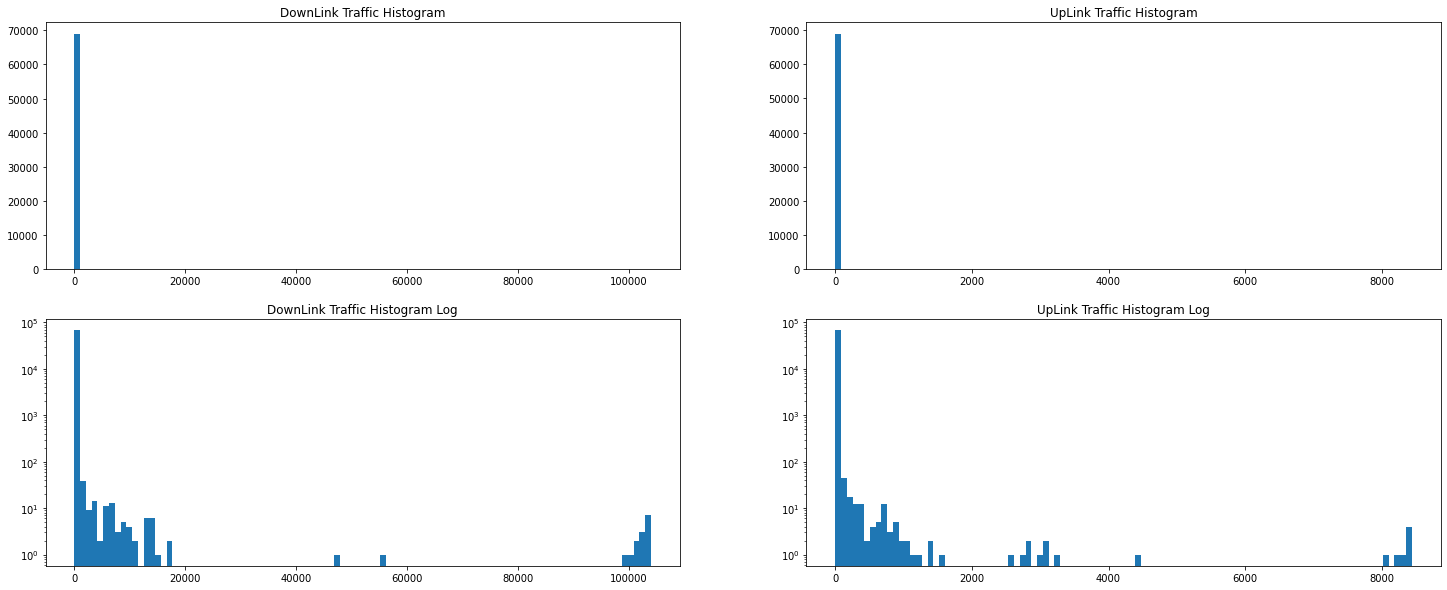

In [32]:
fig, ((plot1, plot2), (plot3, plot4)) = plt.subplots(2,2)
# first row
plot1.hist(Downlink_df["TrafficVolume"], bins=100)
plot1.set_title("DownLink Traffic Histogram")
plot2.hist(Uplink_df["TrafficVolume"], bins=100)
plot2.set_title("UpLink Traffic Histogram")
# Second row
plot3.hist(Downlink_df["TrafficVolume"], bins=100, log=True)
plot3.set_title("DownLink Traffic Histogram Log")
plot4.hist(Uplink_df["TrafficVolume"], bins=100, log=True)
plot4.set_title("UpLink Traffic Histogram Log")

fig.set_figwidth(25)
fig.set_figheight(10) 
plt.show()

The skewness in the dataset is clearly visible most the datapoints have a small value for the traffic volume with few datapoint having a very large value.

In [33]:
df = Downlink_df.copy()

# This step is needed to prepare the data to be plotted on the map
df["LocationLongitude"], df["LocationLatitude"] = lnglat_to_meters(df["LocationLongitude"], df["LocationLatitude"])

In [34]:
# Index must be resetted before plotting
df.reset_index(inplace=True, drop=True)
df.head()

,Timestamp,LocationLatitude,LocationLongitude,RadioConnectionType,RadioNetworkGeneration,RadioOperatorName,TrafficDirection,TrafficVolume,RadioMobileDataEnabled
0,2019-11-01 18:00:00.000000,2.831504e+06,5.201844e+06,Mobile,4G,Operator B,Downlink,45.701516,Enabled
1,2019-11-01 18:15:00.000000,2.831504e+06,5.201844e+06,Mobile,3G,Operator B,Downlink,5.182752,Enabled
2,2019-11-01 18:15:00.000000,2.831504e+06,5.201844e+06,Mobile,4G,Operator B,Downlink,30.303686,Enabled
3,2019-11-01 18:30:00.000000,2.829949e+06,5.197424e+06,Mobile,4G,Operator C,Downlink,2.269045,Enabled
4,2019-11-01 18:30:00.000000,2.831504e+06,5.201844e+06,Mobile,4G,Operator B,Downlink,0.056850,Enabled


# Visualization:
A map per operator is created to identify the areas with high traffic volume.
This is done by two method: using holoviews and using matplotlib.

In [35]:
esri = hv.element.tiles.ESRI().redim(x="Longtitude", y="Latitude").opts(alpha=0.2, width=1000, height=700, bgcolor='black')
COLORS = {"Operator A": cc.kr, "Operator B": cc.kg, "Operator C": cc.kb}

def traffic_plot(operator_name):
    """Plots a hexbin for each operator where the size of each hex depends on the counts of values that falls inside this hex"""
    df_operator = df[df["RadioOperatorName"] == operator_name]
    if (len(df_operator) == 0 ):
        return esri
    operator_tiles =  hv.element.HexTiles(df_operator, kdims=["LocationLongitude", "LocationLatitude"], vdims=["TrafficVolume"])
    operator_tiles.opts(cmap=COLORS[operator_name], 
                        alpha=0.8, 
                        cnorm="eq_hist", 
                        tools=["hover"], 
                        width=900, 
                        height=700, 
                        scale=(hv.dim('TrafficVolume').norm()*0.9)+0.3
                       )
    return (esri * operator_tiles).opts(hv.opts.HexTiles(aggregator=np.sum))

    
operator_select = pn.widgets.RadioButtonGroup(options=list(COLORS.keys()))
interactive = pn.bind(traffic_plot, operator_select)
first_app = pn.Column(operator_select, interactive)
first_app

BokehModel(combine_events=True, render_bundle={'docs_json': {'9c44e81e-dd5a-469d-b19e-c0f6e5144756': {'defs': …

We can also create a static map using the matplotlib api provided by pandas.

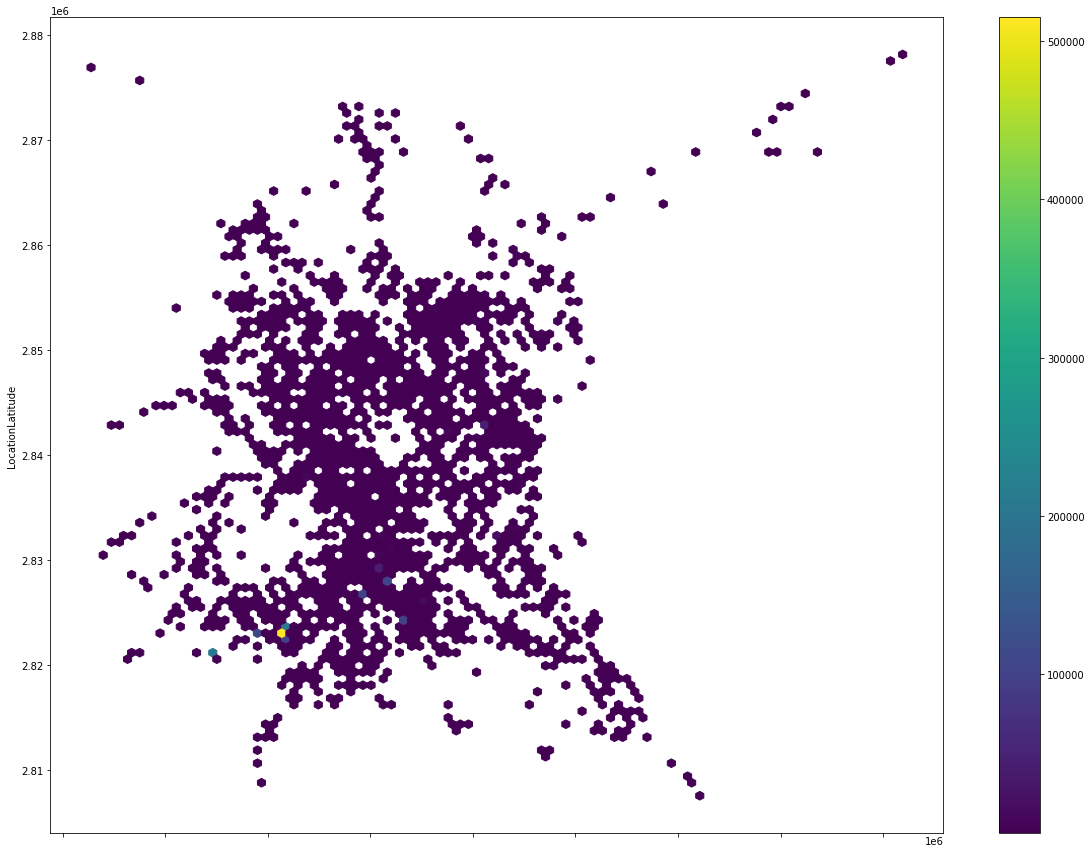

In [36]:
def traffic_map_static(operator_name):
    df_operator = df[df["RadioOperatorName"] == operator_name]

    return df_operator.plot.hexbin( x="LocationLongitude", 
                                    y="LocationLatitude", 
                                    C="TrafficVolume",
                                    reduce_C_function=np.sum, 
                                    cmap="viridis",
                                    figsize=(20,15)
                                    )
traffic_map_static("Operator B")
plt.show()